In [7]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Экспоненциальное распределение

Будем генерировать выборку из экспоненциально распределённой случайной величины.  
Характеристики экспоненциального распределения: $\mu=1$/$\lambda$ и $\sigma^2=1$/$\lambda^2$. 
Для задания возьмем следующие величины: $\lambda$ = 0.1, $\mu=10$, $\sigma^2=100$.
Объем выборки = 1000. Генерируем распределение:

In [8]:
data_expon = sorted(sts.expon.rvs(scale=10, loc = 0, size=1000))
# плотность для распределения
pdf_for_data = sts.expon.pdf(data_expon)

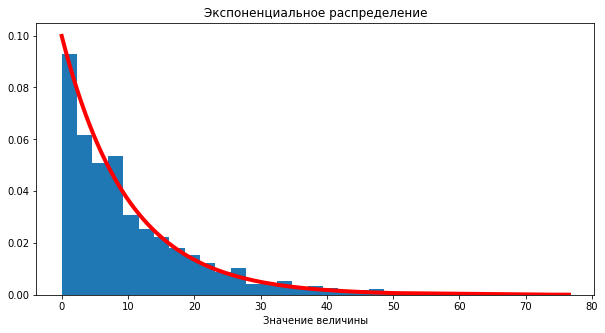

In [9]:
plt.figure(figsize=(10,5))
plt.hist(data_expon, bins = 'auto', density = True)
plt.title('Экспоненциальное распределение')
plt.xlabel('Значение величины')
pdf_expon = sts.expon.pdf(data_expon,0,10)
plt.plot(data_expon, pdf_expon, color = 'red', linewidth=4)
plt.show()

# Генерируем средние для выборок с N = 5,10,50,500

In [17]:
# задаю размеры выборок 
N = (5,10,50,500)

# формирую выборки, считаю их среднее, записываю в двумерный массив results
# - для каждого размера выборки своя строка.

results = np.array([[np.mean(sts.expon.rvs(scale=10, loc = 0, size=i)) for _ in range(1000)] for i in N])

# считаю плотность нормальных распеределений на данных исходной выборки: среднее (loc) = 10, cт.отклонение (scale)= квадратный корень из (100 / на размер выборки). 
# записываю плотности в двумерный массив.

pdf_norm = [sts.norm.pdf(sorted(results[i]), loc = 10, scale = math.sqrt(100 / N[i])) for i in range(len(N))]

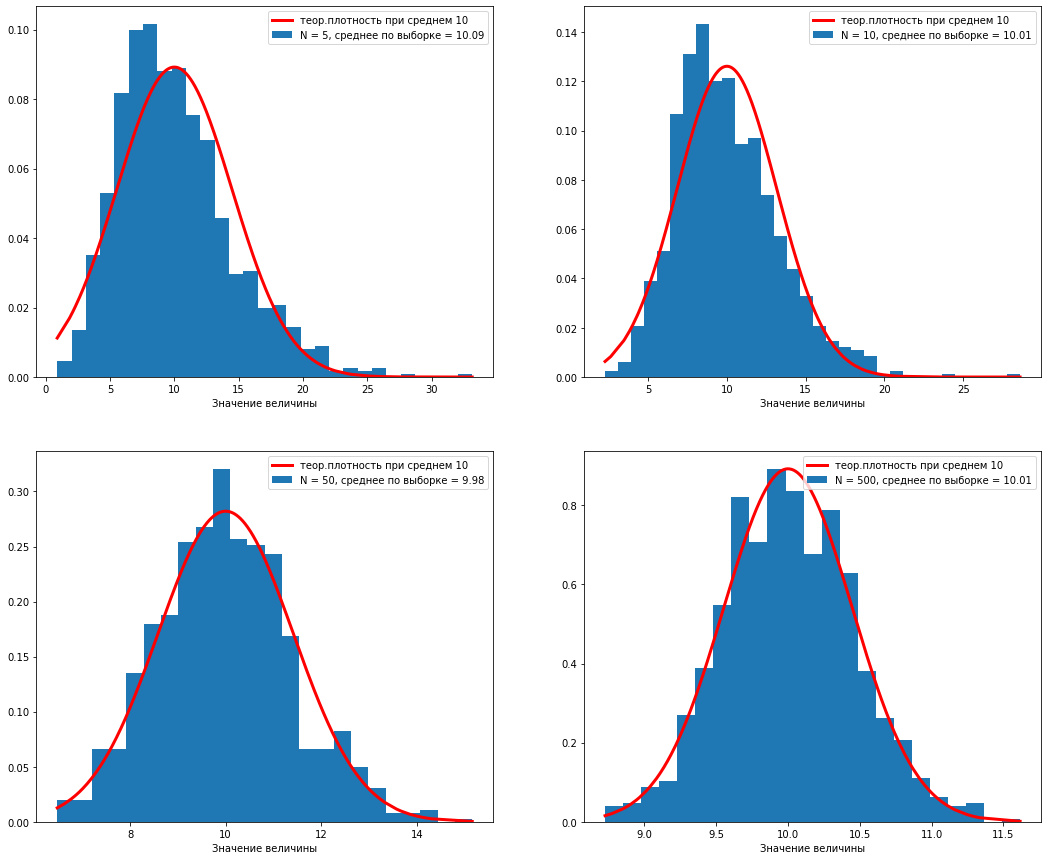

In [18]:
# строю графики

fig, ax = plt.subplots(nrows=2, ncols=2,  figsize=(18, 15))

N_for_chart = 0
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        col.hist(results[N_for_chart],bins = 'auto', density = True, label='N = {}, среднее по выборке = {}'.format(N[N_for_chart], np.round(np.mean(results[N_for_chart]),2) ))
        col.plot(sorted(results[N_for_chart]), pdf_norm[N_for_chart], color = 'red', linewidth=3, label = 'теор.плотность при среднем 10')
        col.set_xlabel('Значение величины')
        col.legend(loc='upper right')
        N_for_chart += 1   
plt.show()

# Выводы: с увеличением размера выборки растет точность апроксимации

In [15]:
# здесь я считаю встроенной в numpy фукнцией ст.отклонения для выборок средних (они в массиве results). 
# Ниже считаю теор.значения на данных для исходной выборки
for i, j in enumerate(N):
    print(np.round(np.std(results[i]),2))

4.41
3.21
1.35
0.44


In [16]:
# на этих значениях ст.отклонения построены графики
for i, j in enumerate(N):
    print(np.round(math.sqrt(100 / j),2))

4.47
3.16
1.41
0.45
